In [2]:
import sys
sys.path.append("/Users/q616967/Workspace/thesis/uni/xai-thesis/")
sys.path.append('/Users/q616967/Library/Python/3.10/lib/python/site-packages')
import utils.features

import os
import json
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

import pprint as pp

In [3]:
PROJECT_DIR = os.path.dirname(os.path.dirname(os.getcwd()))
FEATURES_DIR = os.path.join(PROJECT_DIR, "feature_extraction/featureExtraction/output/")
RESPONSES_DIR = os.path.join(PROJECT_DIR, "responses/")

MODELS_DIR = os.path.join(PROJECT_DIR, "classification/models/")
PREDS_DIR = os.path.join(PROJECT_DIR, "classification/preds/")
STATS_DIR = os.path.join(PROJECT_DIR, "classification/stats/")

In [4]:
run_file_map = {
    'all': 'classification/stats/04091703_all_2000.json',
    'col': 'classification/stats/04091703_col_2000.json',
    'col-rfe': 'classification/stats/04091703_col-rfe_2000.json',
    'col-rfe-kbest': 'classification/stats/04091703_col-rfe-kbest_2000.json',
}

In [6]:
def get_most_important_features(coefficients_dict, pos_or_neg, n=10):
    return sorted(
        coefficients_dict,
        key=coefficients_dict.get,
        reverse=True if pos_or_neg == 'pos' else False,
    )[:n]

#top_pos_features = get_most_important_features(stats['coefficients'], 'pos')
#top_neg_features = get_most_important_features(stats['coefficients'], 'neg')

In [7]:
def visualize_results(stats_file, n_features=10):
    
    # load file with results
    with open(os.path.join(PROJECT_DIR, stats_file), "r") as f:
        stats = json.load(f)
        coef_dict, scores_dict = stats['coefficients'], stats['scores']

    # metrics
    # round floats in scores_dict to 2 decimals
    for key, value in scores_dict.items():
        if isinstance(value, float):
            scores_dict[key] = round(value, 2)
        elif isinstance(value, dict):
            for inner_key, inner_value in value.items():
                if isinstance(inner_value, float):
                    scores_dict[key][inner_key] = round(inner_value, 2)
                if inner_key == 'support':
                    scores_dict[key][inner_key] = int(inner_value)
    
    pp.pprint(scores_dict, indent=4)
    
    # feature importances
    coef_df = pd.DataFrame(coef_dict.items(), columns=['feature', 'coefficient'])
    coef_df = coef_df.sort_values(by='coefficient', ascending=False)

    top_n_pos_features = coef_df.head(n_features)
    top_n_neg_features = coef_df.tail(n_features)
    top_features_df = pd.merge(top_n_pos_features, top_n_neg_features, how='outer')

    top_features_df.plot(x='feature', y='coefficient', kind='barh', figsize=(20, 10))

# 2000

## All features

{   'False': {   'f1-score': 0.48,
                 'precision': 0.54,
                 'recall': 0.43,
                 'support': 164},
    'True': {   'f1-score': 0.7,
                'precision': 0.65,
                'recall': 0.75,
                'support': 236},
    'accuracy': 0.61,
    'macro avg': {   'f1-score': 0.59,
                     'precision': 0.6,
                     'recall': 0.59,
                     'support': 400},
    'weighted avg': {   'f1-score': 0.61,
                        'precision': 0.61,
                        'recall': 0.61,
                        'support': 400}}


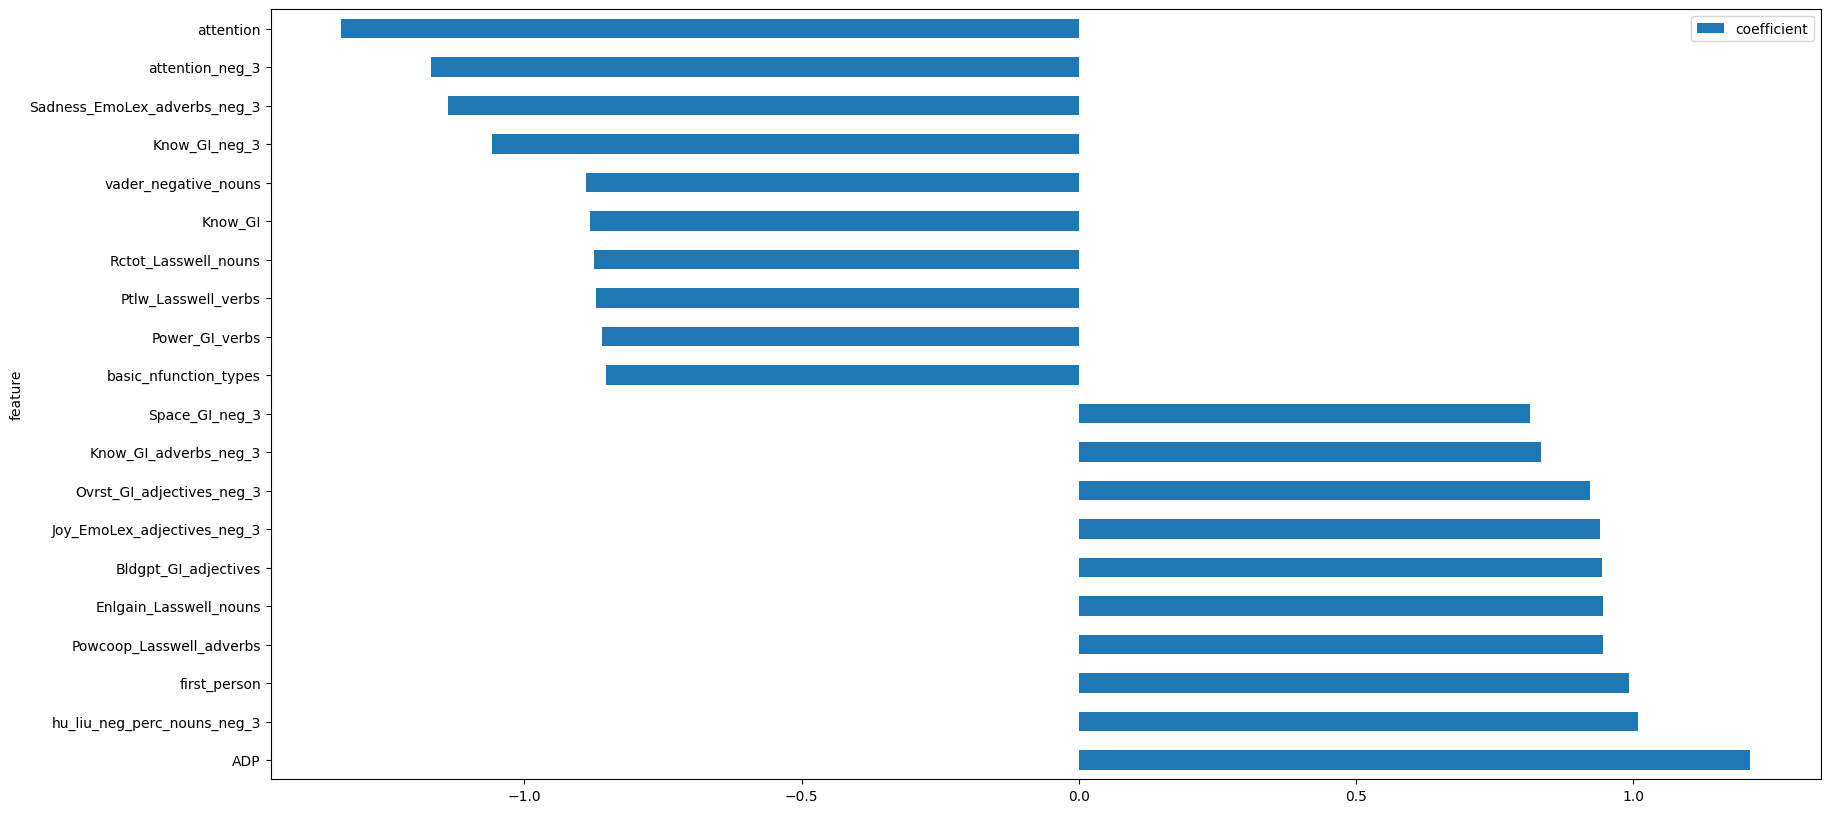

In [8]:
visualize_results(run_file_map['all'], n_features=10)

## No collinear features

{   'False': {   'f1-score': 0.52,
                 'precision': 0.61,
                 'recall': 0.45,
                 'support': 164},
    'True': {   'f1-score': 0.73,
                'precision': 0.68,
                'recall': 0.8,
                'support': 236},
    'accuracy': 0.66,
    'macro avg': {   'f1-score': 0.63,
                     'precision': 0.64,
                     'recall': 0.63,
                     'support': 400},
    'weighted avg': {   'f1-score': 0.65,
                        'precision': 0.65,
                        'recall': 0.66,
                        'support': 400}}


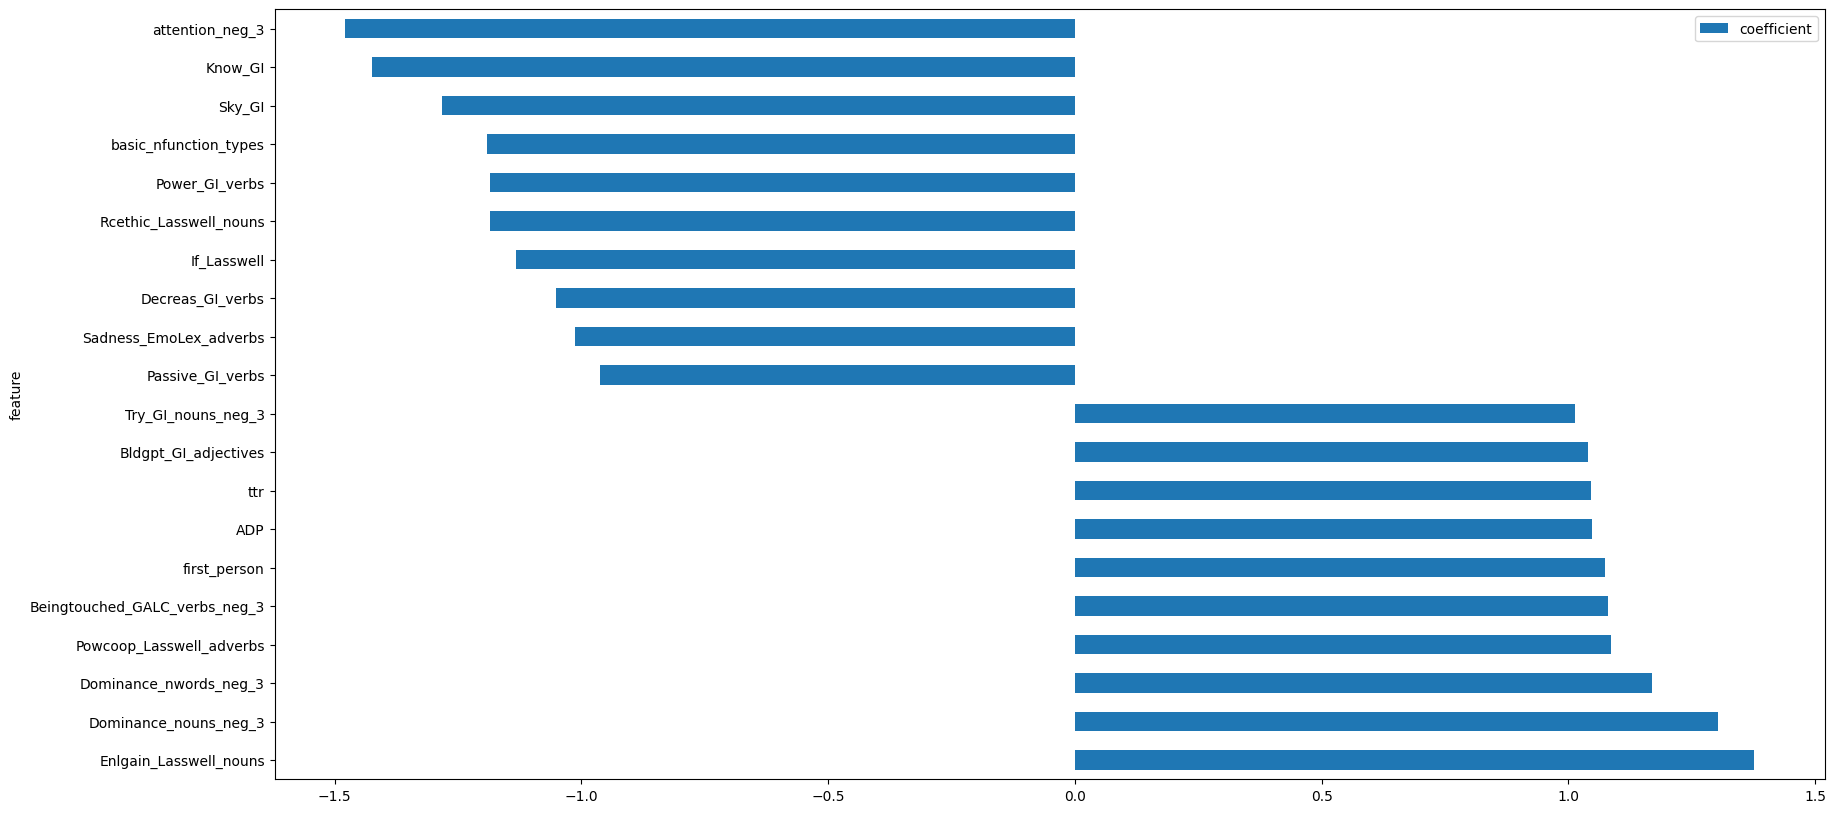

In [9]:
visualize_results(run_file_map['col'], n_features=10)

## No collinear features + Recursive Feature Elimination (RFE)

{   'False': {   'f1-score': 0.62,
                 'precision': 0.72,
                 'recall': 0.54,
                 'support': 164},
    'True': {   'f1-score': 0.79,
                'precision': 0.73,
                'recall': 0.86,
                'support': 236},
    'accuracy': 0.73,
    'macro avg': {   'f1-score': 0.7,
                     'precision': 0.73,
                     'recall': 0.7,
                     'support': 400},
    'weighted avg': {   'f1-score': 0.72,
                        'precision': 0.73,
                        'recall': 0.73,
                        'support': 400}}


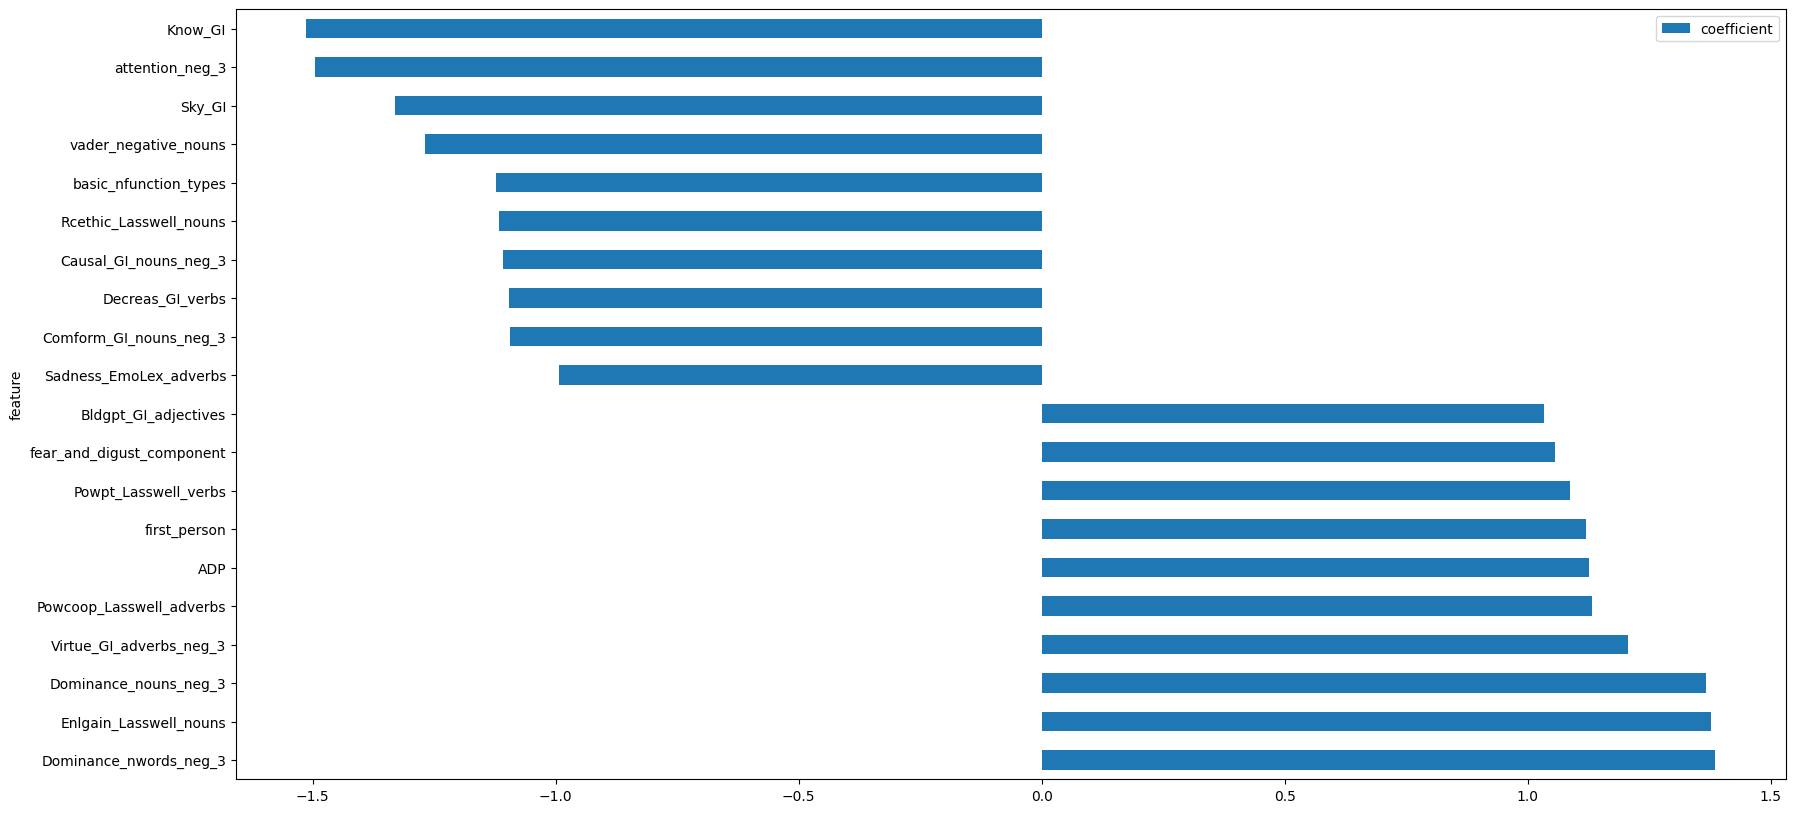

In [10]:
visualize_results(run_file_map['col-rfe'], n_features=10)

## No collinear features + RFE + SelectKBest

{   'False': {   'f1-score': 0.55,
                 'precision': 0.66,
                 'recall': 0.47,
                 'support': 164},
    'True': {   'f1-score': 0.76,
                'precision': 0.69,
                'recall': 0.83,
                'support': 236},
    'accuracy': 0.68,
    'macro avg': {   'f1-score': 0.65,
                     'precision': 0.68,
                     'recall': 0.65,
                     'support': 400},
    'weighted avg': {   'f1-score': 0.67,
                        'precision': 0.68,
                        'recall': 0.68,
                        'support': 400}}


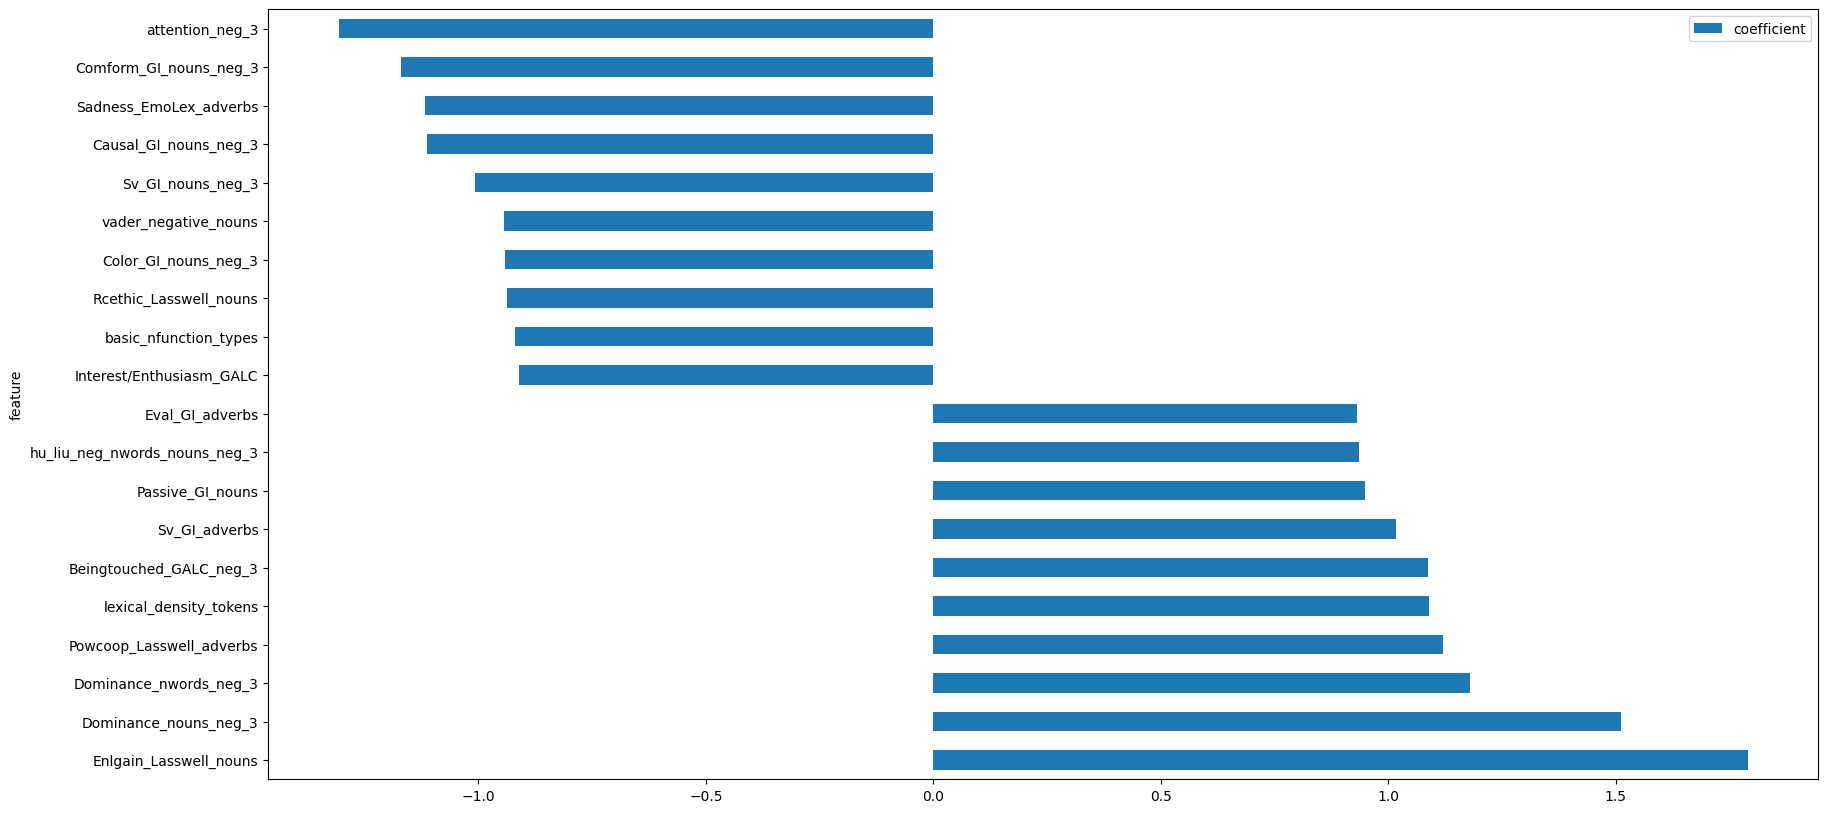

In [11]:
visualize_results(run_file_map['col-rfe-kbest'], n_features=10)